In [1]:
import kagglehub
import os
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
# Download latest version
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")

In [3]:
os.listdir(path)

['TEP_FaultFree_Testing.RData',
 'TEP_FaultFree_Training.RData',
 'TEP_Faulty_Testing.RData',
 'TEP_Faulty_Training.RData']

In [4]:
df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']
df_free

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,500.0,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.0,500.0,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.0,500.0,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.0,500.0,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [5]:
df_free_run1 = df_free[(df_free['simulationRun']==1.0)]
df_free_run1 = df_free_run1.reset_index()
df_free_run1 = df_free_run1.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
df_free_run1

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.24602,3651.9,4504.4,9.4721,26.600,42.312,2707.2,74.623,120.40,0.32381,...,54.132,23.663,59.588,22.481,38.952,33.489,45.203,49.900,41.057,16.448
496,0.23457,3663.0,4529.5,9.3440,26.872,42.434,2704.1,75.123,120.40,0.35454,...,54.028,22.776,60.566,22.237,42.978,38.017,42.637,50.075,41.339,17.435
497,0.23068,3656.4,4493.0,9.2978,26.920,42.536,2700.3,74.942,120.39,0.35859,...,54.465,23.158,62.102,21.639,42.483,41.016,46.782,50.098,41.277,18.315
498,0.24263,3632.5,4521.5,9.3915,26.956,42.317,2701.9,74.900,120.37,0.34057,...,54.532,23.386,63.164,22.661,39.558,37.892,47.468,50.312,40.557,19.198


In [6]:
# change variable names
df_free_run1.columns = [str(i) for i in range(len(df_free_run1.columns))]

In [7]:
df_free_run1.agg({'mean'})

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
mean,0.250589,3662.7732,4509.5772,9.344804,26.907058,42.340676,2704.357,75.017246,120.40004,0.337032,...,53.95955,24.654356,61.237696,22.157482,40.106614,38.281098,46.628864,49.007676,41.101936,18.092588


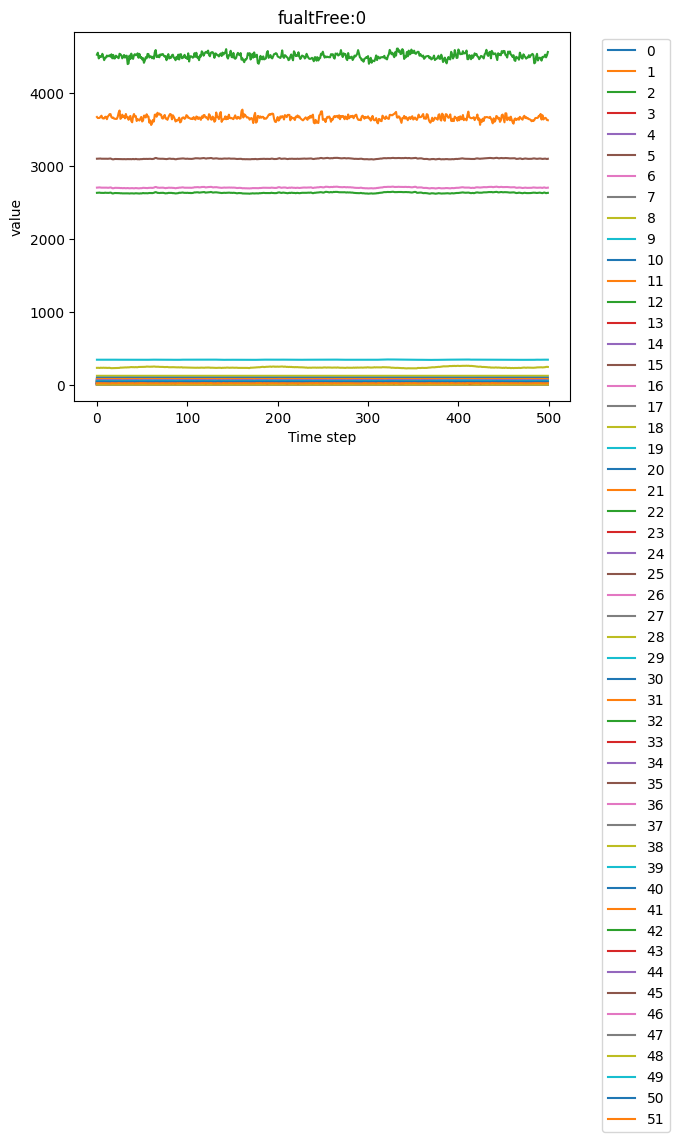

In [8]:
df_free_run1.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time step')
plt.ylabel('value')
plt.title('fualtFree:0')
plt.show()

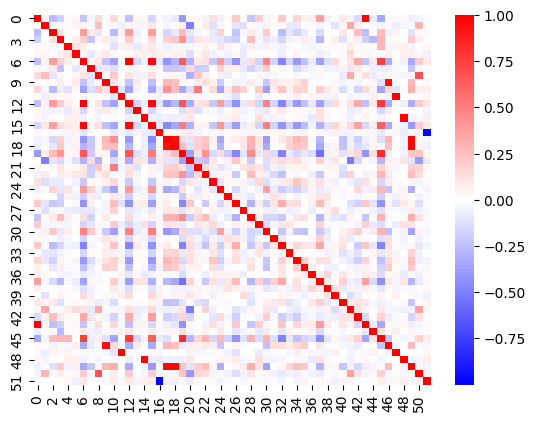

In [9]:
sns.heatmap(df_free_run1.corr(), cmap=plt.cm.bwr)
plt.show()

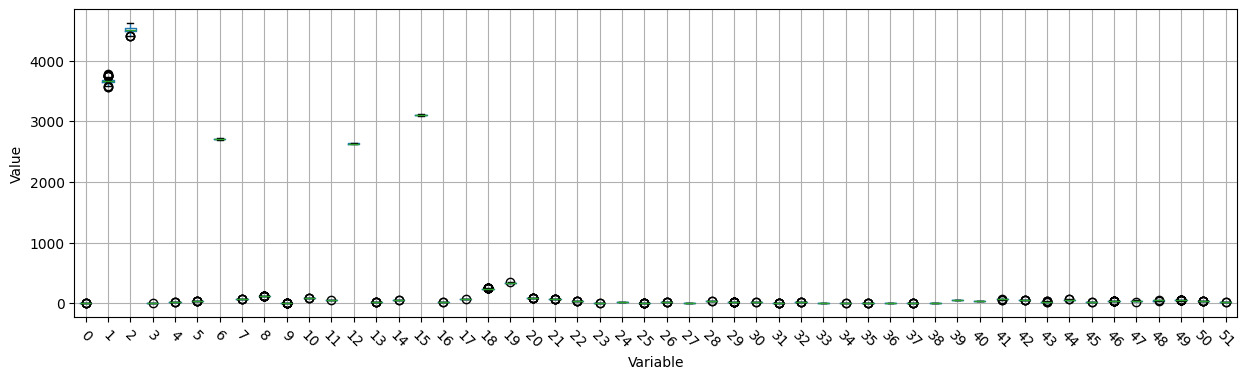

In [10]:
df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

# for i in range(10):
#     df_free_run1.boxplot(figsize=(15,4), rot=-45)
#     plt.ylim(500*i,500*(i+1))
#     plt.show()

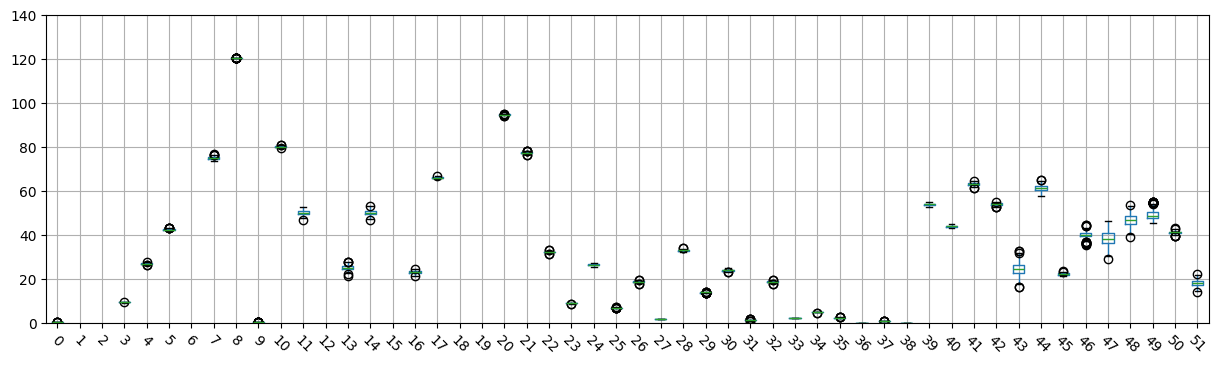

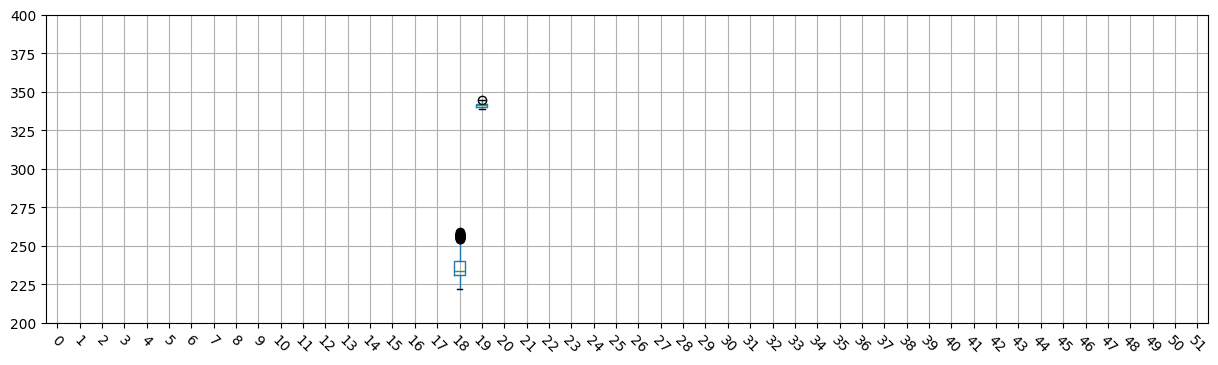

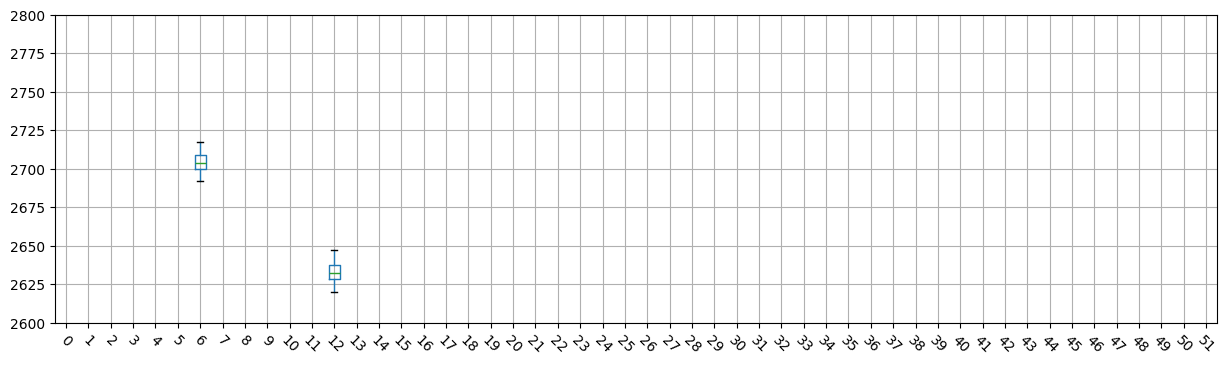

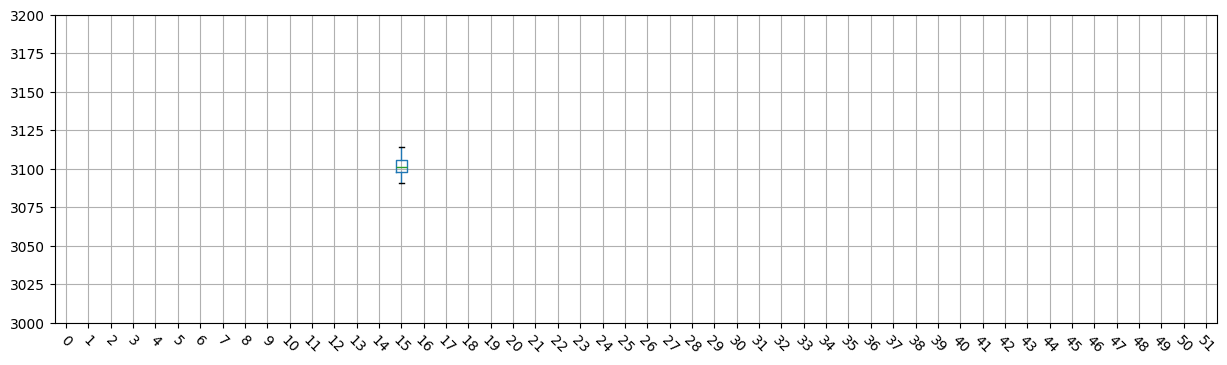

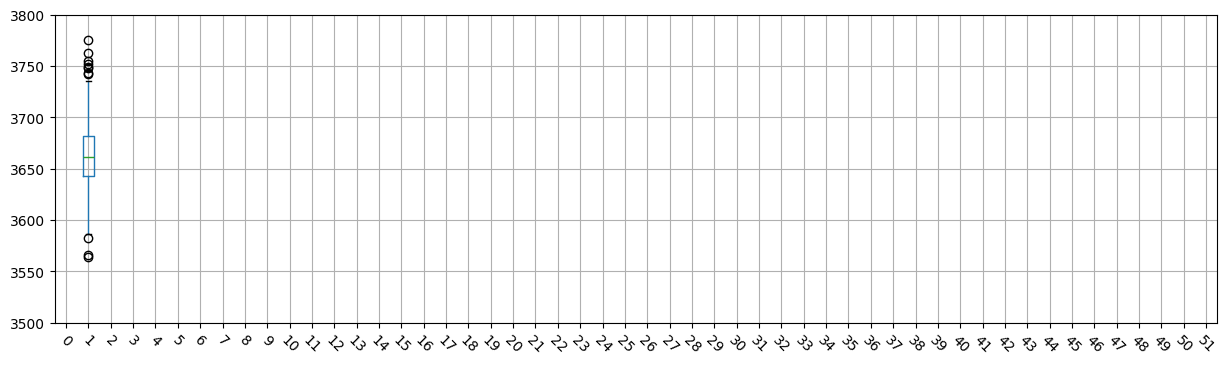

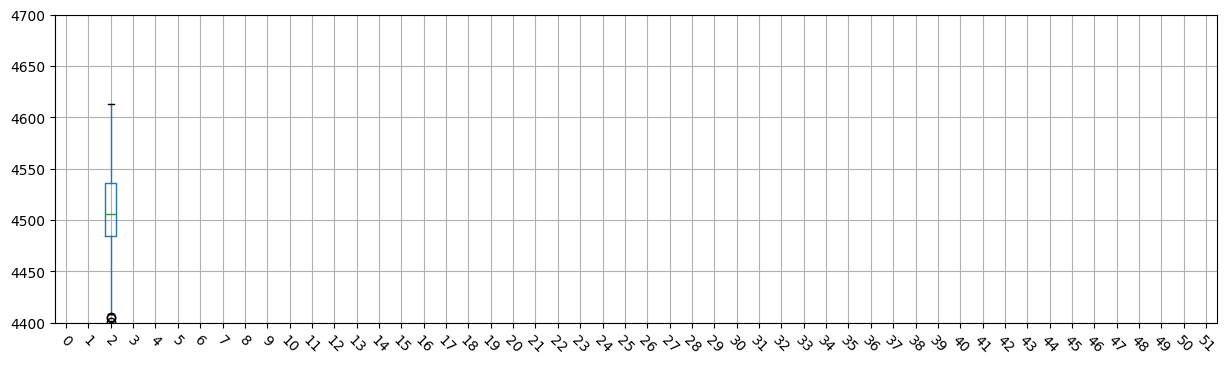

In [11]:
axs = df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(0,140)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_0', bbox_inches='tight')
plt.show()

axs =df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(200,400)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_1', bbox_inches='tight')
plt.show()

axs =df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(2600,2800)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_2', bbox_inches='tight')
plt.show()

axs =df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(3000,3200)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_3', bbox_inches='tight')
plt.show()

axs =df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(3500,3800)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_4', bbox_inches='tight')
plt.show()

axs =df_free_run1.boxplot(figsize=(15,4), rot=-45)
plt.ylim(4400,4700)
fig = axs.get_figure()
fig.savefig(f'figure/fault_free_box_5', bbox_inches='tight')
plt.show()

In [12]:
# value range
df_free_run1_stat = df_free_run1.agg(['min','max']).T
df_free_run1_stat['range'] = df_free_run1_stat['max'] - df_free_run1_stat['min']
df_free_run1_stat

,min,max,range
0,0.163350,0.336420,0.173070
1,3564.600000,3775.000000,210.400000
2,4400.500000,4613.400000,212.900000
3,9.126600,9.575700,0.449100
4,26.201000,27.501000,1.300000
5,41.796000,43.040000,1.244000
6,2692.300000,2717.700000,25.400000
7,73.677000,76.538000,2.861000
8,120.320000,120.470000,0.150000
9,0.302960,0.375360,0.072400


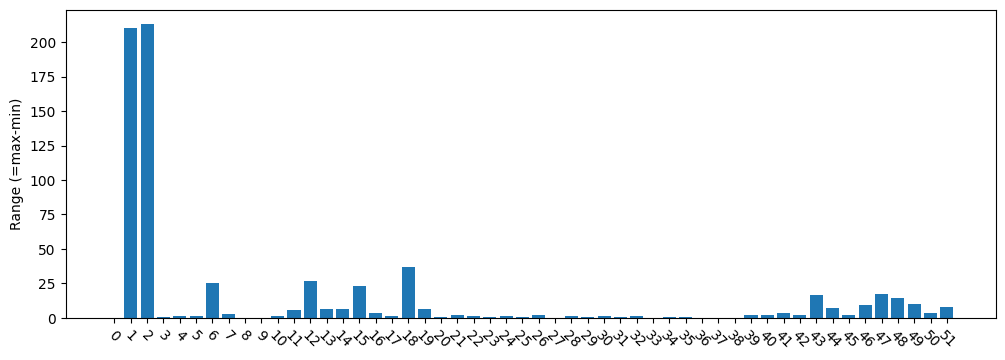

In [13]:
plt.figure(figsize=(12,4))
plt.bar(df_free_run1_stat.index, df_free_run1_stat['range'])
plt.xticks(rotation = -45)
plt.ylabel('Range (=max-min)')
plt.show()

52 52


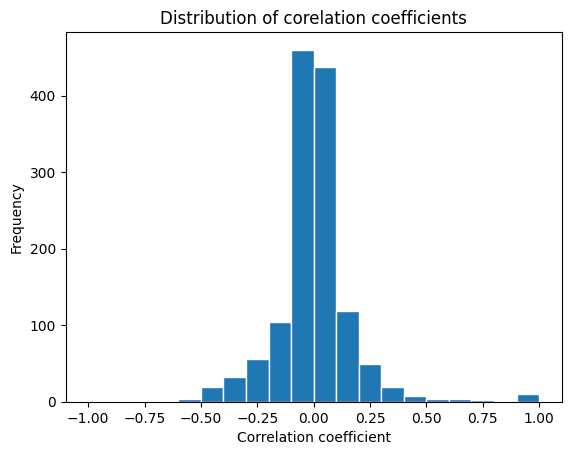

In [14]:
# correlation distribution
df_free_run1_values = df_free_run1.corr().values.tolist()
print(len(df_free_run1_values), len(df_free_run1_values[0]))

df_free_run1_values = np.unique(np.triu(df_free_run1_values, 1).flatten())
plt.hist(df_free_run1_values, bins=np.arange(-1,1.1,0.1), edgecolor='white')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of corelation coefficients')
plt.show()

In [15]:
df_free = pyreadr.read_r(path+'/TEP_FaultFree_Training.RData')
df_free = df_free['fault_free_training']

df_free_runs = [] 
for run_number in range(1,501):
    df_temp = df_free[(df_free['simulationRun'] == run_number)]
    df_temp = df_temp.reset_index()
    df_temp = df_temp.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
    df_free_runs.append(df_temp)
    
df_free_runs = [i.values.tolist() for i in df_free_runs]
len(df_free_runs[0][0])

52

In [16]:
df_free_runs_avg = []
for i in range(500): # samples
    for j in range(52): # variables
        temp_sum = 0
        for k in range(500): # runs
            temp_sum += df_free_runs[k][i][j]
        df_free_runs_avg.append(round(temp_sum/500,3))

pd.DataFrame(np.array(df_free_runs_avg).reshape(500,52))

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.250,3664.491,4510.218,9.352,26.921,42.325,2705.006,75.004,120.400,0.337,...,53.969,24.652,61.326,22.225,40.063,38.140,46.463,47.436,41.084,18.098
1,0.251,3664.286,4510.866,9.351,26.910,42.318,2705.096,75.002,120.400,0.337,...,53.961,24.644,61.313,22.221,40.082,37.914,46.518,47.447,41.116,18.178
2,0.251,3665.120,4509.580,9.344,26.895,42.341,2705.070,75.006,120.400,0.337,...,53.976,24.650,61.310,22.207,40.055,37.999,46.709,47.453,41.088,18.009
3,0.251,3663.875,4507.650,9.352,26.910,42.337,2704.951,74.981,120.400,0.337,...,53.999,24.649,61.326,22.198,40.066,38.189,46.552,47.449,41.128,18.071
4,0.250,3663.604,4510.876,9.347,26.883,42.335,2704.859,74.985,120.399,0.337,...,53.977,24.623,61.310,22.205,40.092,38.064,46.567,47.449,41.075,18.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.251,3664.342,4510.820,9.346,26.914,42.347,2705.775,75.031,120.400,0.336,...,54.013,24.674,61.248,22.249,39.938,38.046,46.714,47.856,41.113,18.210
496,0.252,3661.080,4510.124,9.347,26.889,42.357,2705.734,75.013,120.399,0.336,...,53.999,24.808,61.302,22.234,39.940,38.350,46.308,47.853,41.065,18.071
497,0.252,3661.236,4509.628,9.344,26.915,42.328,2705.817,75.075,120.401,0.336,...,54.005,24.807,61.340,22.270,39.941,38.256,46.590,47.844,41.092,18.022
498,0.250,3664.500,4513.723,9.346,26.897,42.324,2705.828,75.023,120.400,0.336,...,54.015,24.566,61.271,22.256,39.954,38.205,46.431,47.842,41.108,18.126


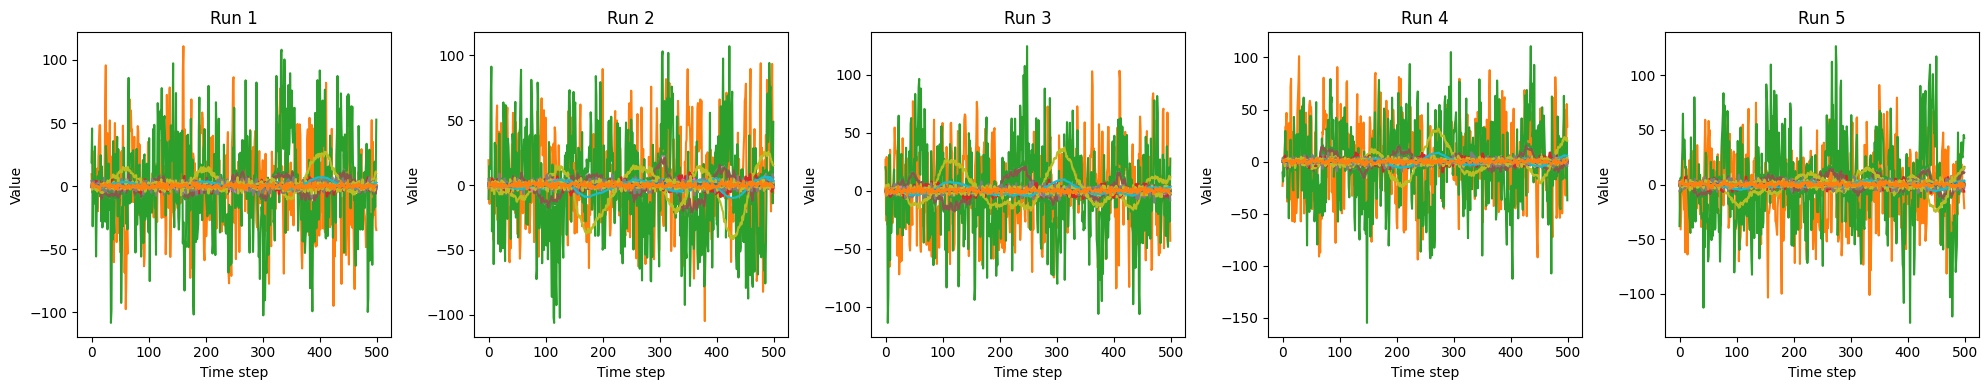

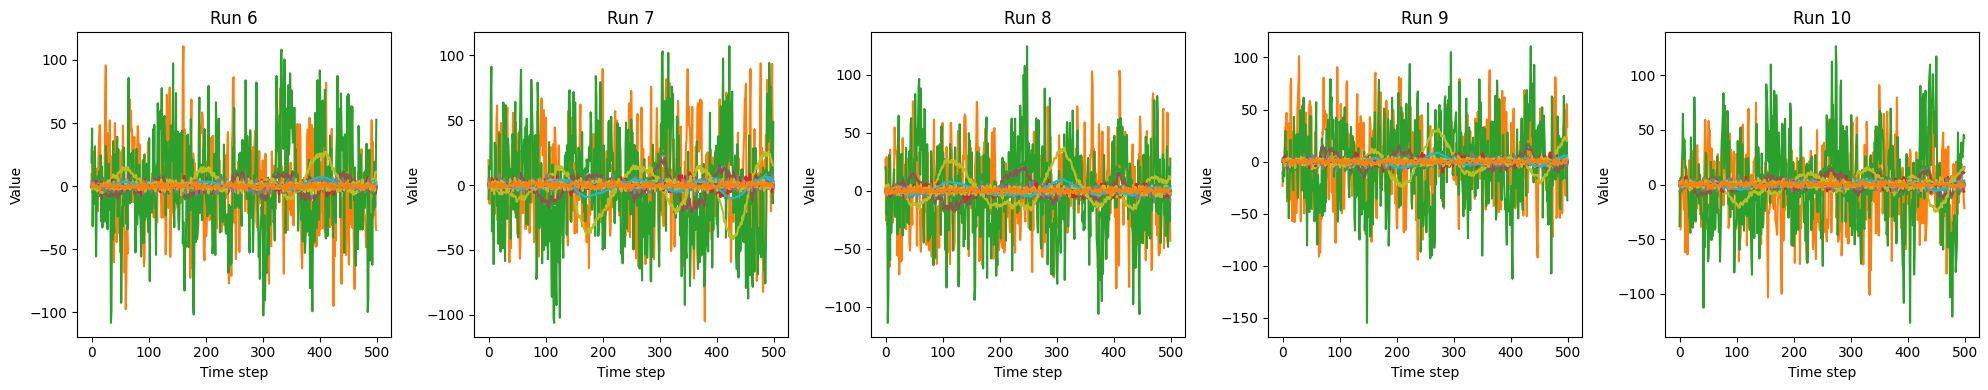

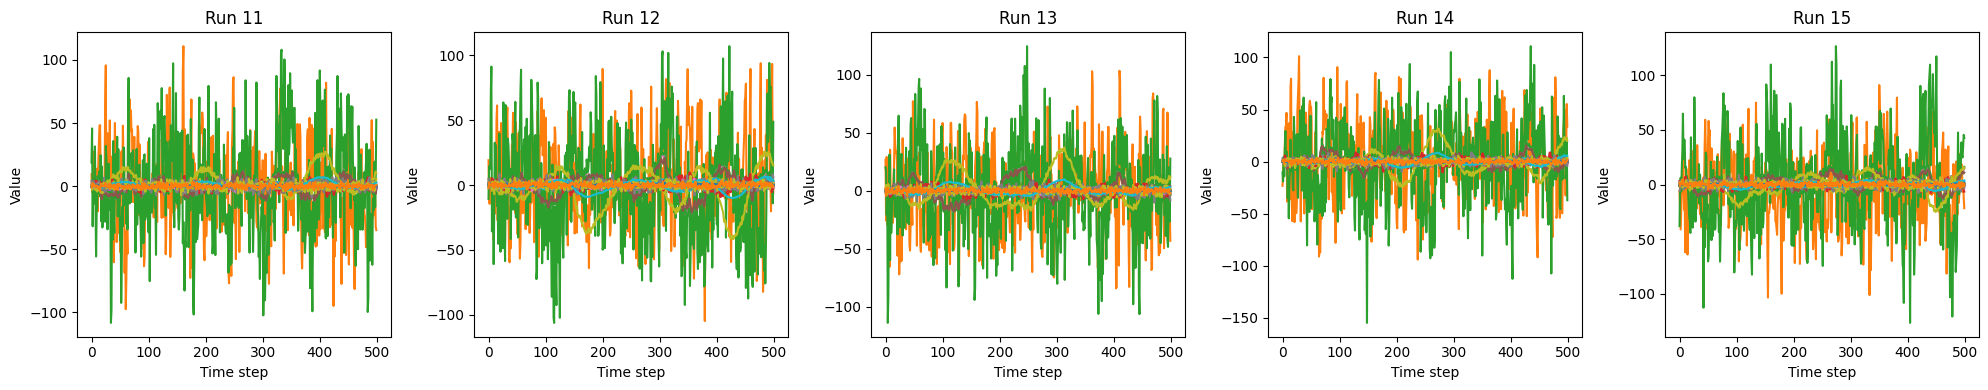

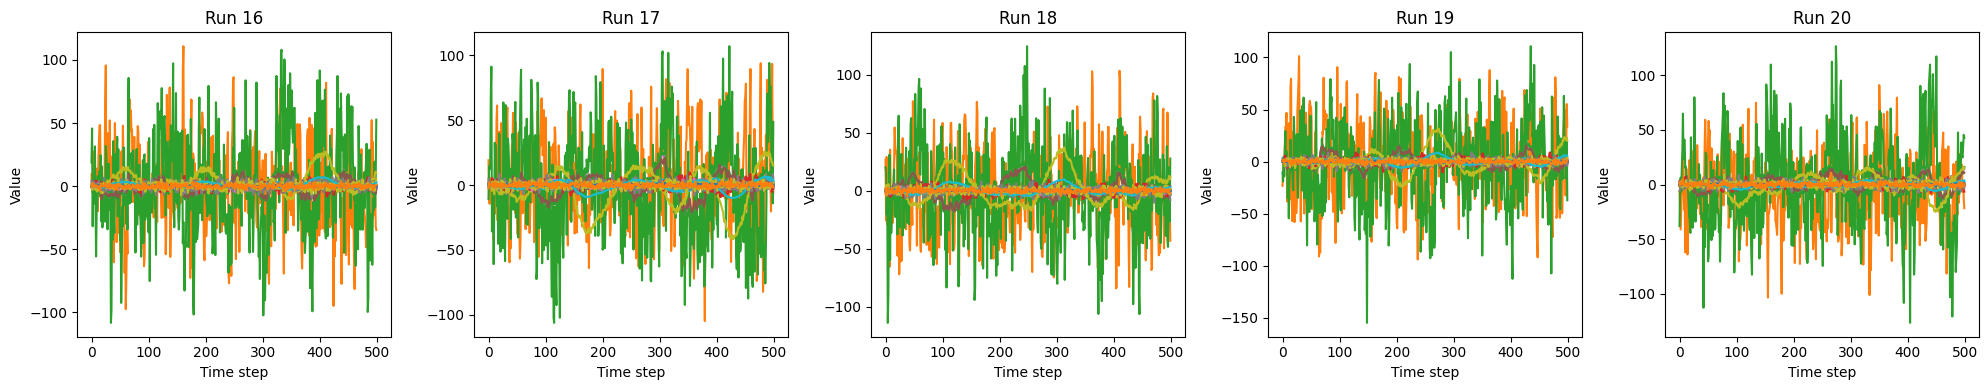

In [37]:
df_free_runs_avg_ref = pd.DataFrame(np.array(df_free_runs_avg).reshape(500,52))

# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_free[(df_free['simulationRun'] == run_number)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df = df.subtract(df_free_runs_avg_ref)

        # Plot data
        axes[col].plot(pd.DataFrame(df_free_runs[col]).subtract(df_free_runs_avg_ref))
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Run {run_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

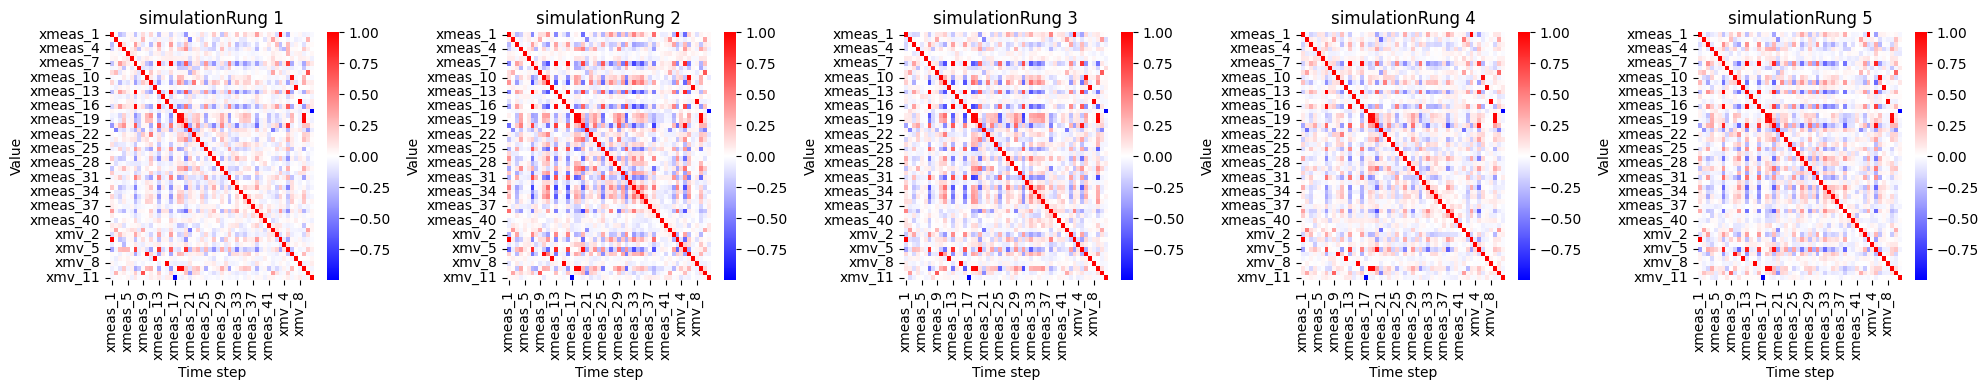

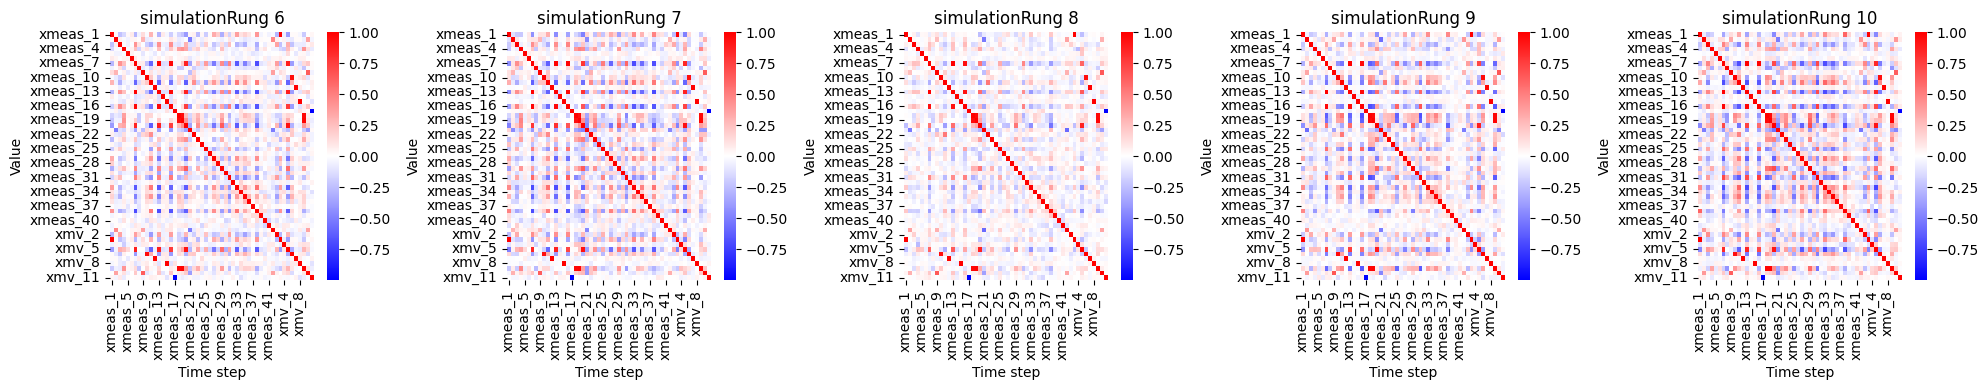

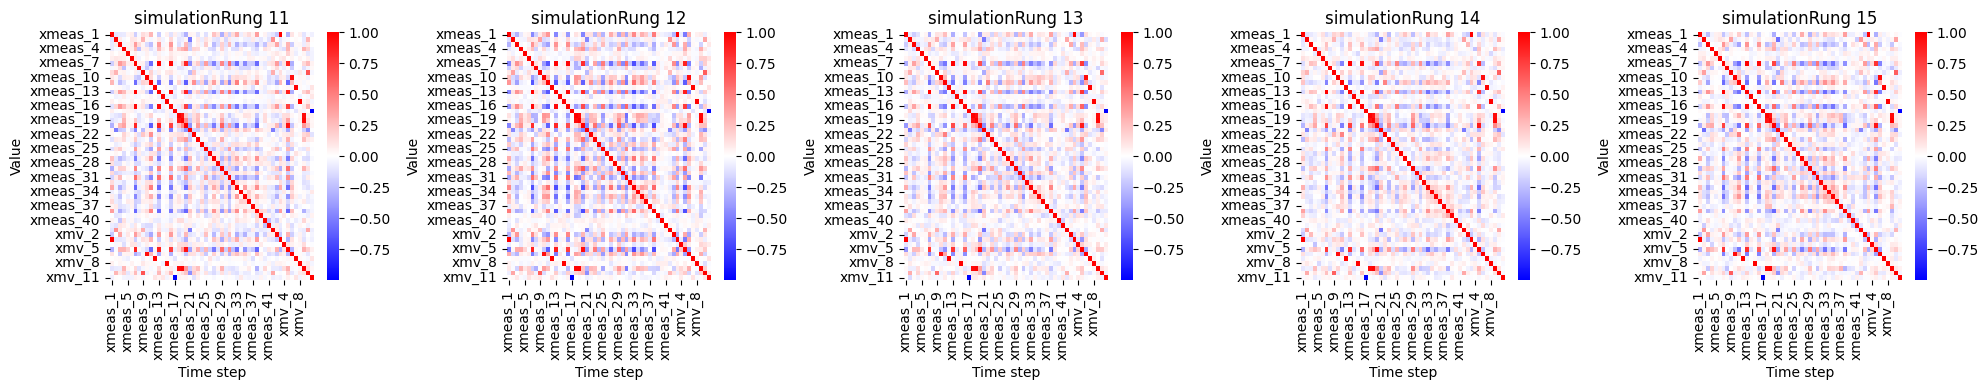

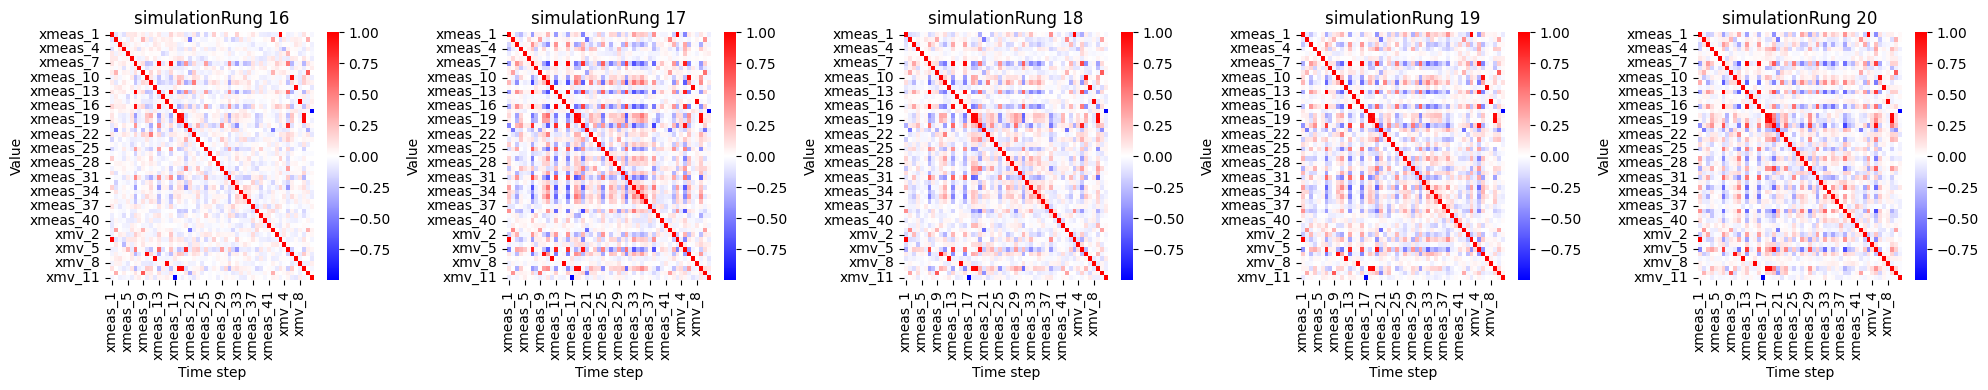

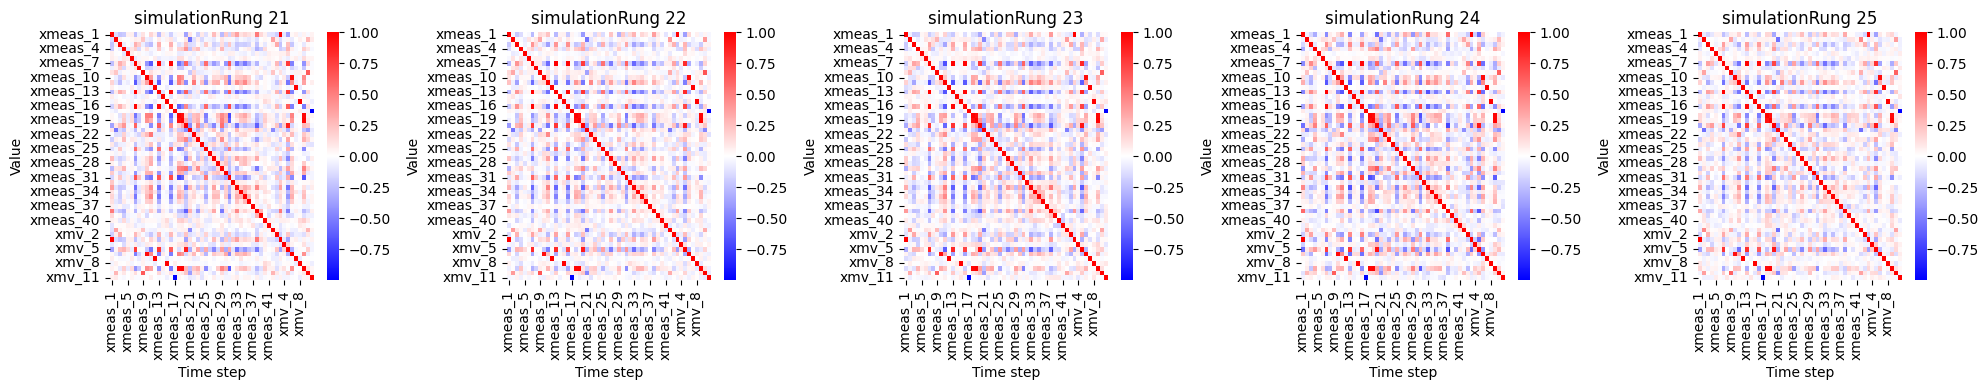

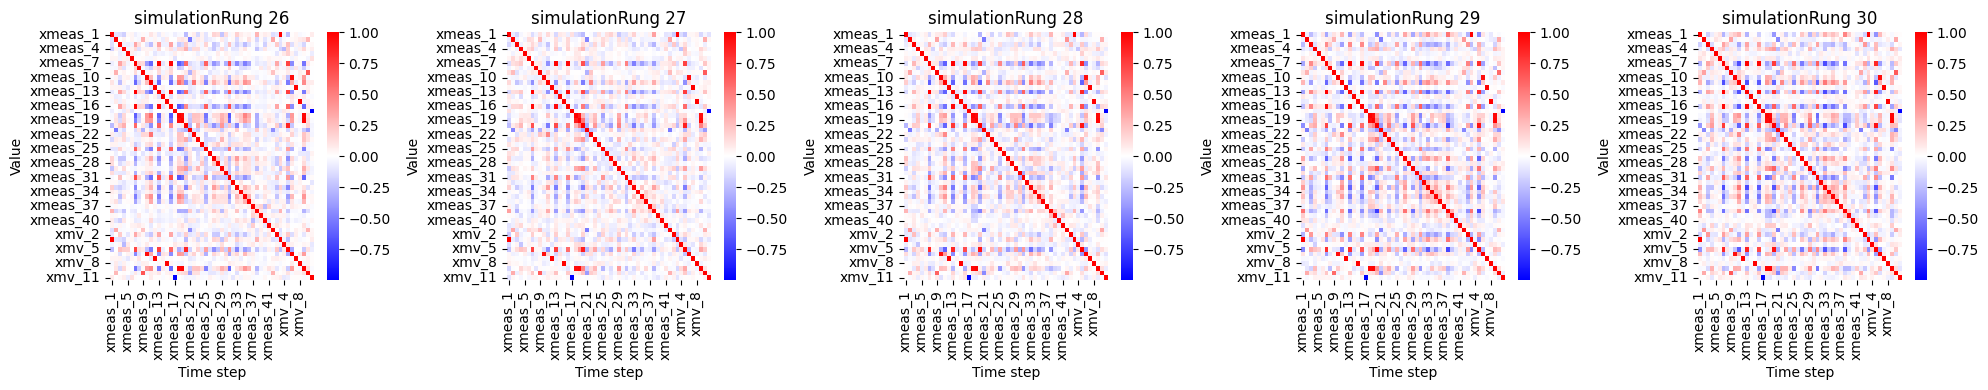

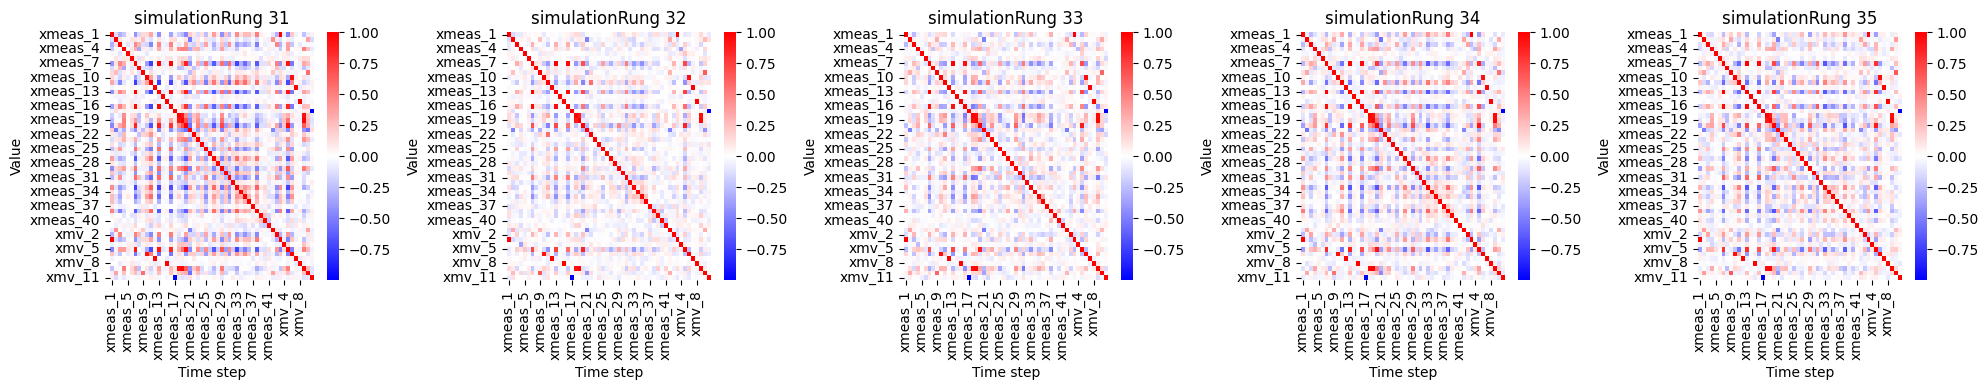

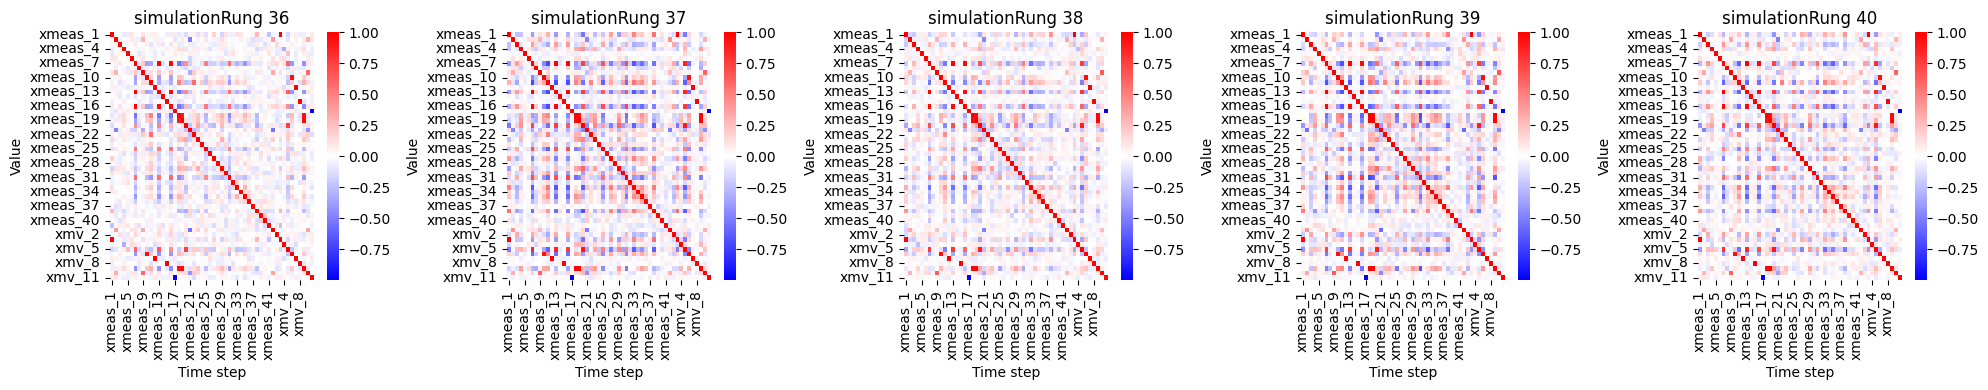

In [38]:
import matplotlib.pyplot as plt

# Specify the number of plots per row
plots_per_row = 5
total_plots = 40  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_free[(df_free['simulationRun'] == run_number)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])

        # Plot data
        sns.heatmap(df.corr(), cmap=plt.cm.bwr, ax=axes[col])
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'simulationRung {run_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [39]:
df_fault = pyreadr.read_r(path+'/TEP_Faulty_Training.RData')
df_fault = df_fault['faulty_training']
df_fault.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [ ]:
df_fualt_run1 = df_fault[(df_fault['faultNumber']==1)&(df_fault['simulationRun']==1.0)]
df_fualt_run1 = df_fualt_run1.reset_index()
df_fualt_run1 = df_fualt_run1.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
df_fualt_run1

In [ ]:
# change variable names
df_fualt_run1.columns = [str(i) for i in range(len(df_fualt_run1.columns))]

In [ ]:
df_fualt_run1.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time step')
plt.ylabel('value')
plt.title('faulty:1')
plt.show()

In [ ]:
sns.heatmap(df_fualt_run1.corr(), cmap=plt.cm.bwr)
plt.show()

In [ ]:
df_fualt_run2= df_fault[(df_fault['faultNumber']==2)&(df_fault['simulationRun']==1.0)]
df_fualt_run2= df_fualt_run2.reset_index()
df_fualt_run2 = df_fualt_run2.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])

df_fualt_run2.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time step')
plt.ylabel('value')
plt.title('faulty:2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        fault_number = row * plots_per_row + col + 1
        if fault_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['faultNumber'] == fault_number) & (df_fault['simulationRun'] == 1.0)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])

        # Plot data
        df.plot(ax=axes[col], legend=False)
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Fault {fault_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['simulationRun'] == run_number)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])

        # Plot data
        axes[col].plot(pd.DataFrame(df_free_runs[col]).subtract(df_free_runs_avg_ref))
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Run {run_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        fault_number = row * plots_per_row + col + 1
        if fault_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['faultNumber'] == fault_number) & (df_fault['simulationRun'] == 1.0)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df.columns = [str(i) for i in range(len(df.columns))]

        # Plot data
        df.subtract(df_free_run1).plot(ax=axes[col], legend=False)
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Relative value w.r.t the reference ones')
        axes[col].set_title(f'Fault {fault_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['simulationRun'] == run_number)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df.columns = [str(i) for i in range(len(df.columns))]        

        # Plot data
        sns.heatmap(df.corr(), cmap=plt.cm.bwr, ax=axes[col])
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Run {run_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# correlation coefficient distribution
# get the upper triangles and draw associated histograms
# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        run_number = row * plots_per_row + col + 1
        if run_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['simulationRun'] == run_number)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df.columns = [str(i) for i in range(len(df.columns))]        

        # Plot data
        df_values = df.corr().values.tolist()        
        df_values = np.unique(np.triu(df_values, 1).flatten())
        axes[col].hist(df_values, bins=np.arange(-1,1.1,0.1), edgecolor='white', color='darkred')
        axes[col].set_xlabel('Correlation coefficient')
        axes[col].set_ylabel('Frequency')
        axes[col].set_title(f'Run {run_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# homogeneity test to the 500 samples with openCV?
import cv2
# reads an input image
img = cv2.imread('tep_fault_patterns.png',0)

# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [ ]:
# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        fault_number = row * plots_per_row + col + 1
        if fault_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['faultNumber'] == fault_number) & (df_fault['simulationRun'] == 1.0)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df.columns = [str(i) for i in range(len(df.columns))]        

        # Plot data
        sns.heatmap(df.corr(), cmap=plt.cm.bwr, ax=axes[col])
        axes[col].set_xlabel('Time step')
        axes[col].set_ylabel('Value')
        axes[col].set_title(f'Fault {fault_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# Specify the number of plots per row
plots_per_row = 5
total_plots = 20  # Total number of faults

# Determine the number of rows needed
num_rows = (total_plots + plots_per_row - 1) // plots_per_row

for row in range(num_rows):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(20, 4))
    for col in range(plots_per_row):
        fault_number = row * plots_per_row + col + 1
        if fault_number > total_plots:
            axes[col].axis('off')  # Turn off axes for unused subplots
            continue

        # Filter and process data for the current fault
        df = df_fault[(df_fault['faultNumber'] == fault_number) & (df_fault['simulationRun'] == 1.0)]
        df = df.reset_index()
        df = df.drop(columns=['index', 'faultNumber', 'simulationRun', 'sample'])
        df.columns = [str(i) for i in range(len(df.columns))]        

        # Plot data
        df_values = df.corr().values.tolist()        
        df_values = np.unique(np.triu(df_values, 1).flatten())
        axes[col].hist(df_values, bins=np.arange(-1,1.1,0.1), edgecolor='white', color='darkred')
        axes[col].set_xlabel('Correlation coefficient')
        axes[col].set_ylabel('Frequency')
        axes[col].set_title(f'Fault {fault_number}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
# correlation distribution
df_fualt_run1_values = df_fualt_run1.corr().values.tolist()
print(len(df_fualt_run1_values), len(df_fualt_run1_values[0]))

df_fualt_run1_values = np.unique(np.triu(df_fualt_run1_values, 1).flatten())
plt.hist(df_fualt_run1_values, bins=np.arange(-1,1.1,0.1), edgecolor='white', color='darkred')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of corelation coefficients')
plt.show()

In [ ]:
# sample five
df_fualt_run1.loc[:4]

In [ ]:
df_fualt_int1 = df_fualt_run1.loc[:4]
df_fualt_int1.plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Fault1;interval1')
plt.show()

sns.heatmap(df_fualt_int1.corr(), cmap=plt.cm.bwr)
plt.show()

In [ ]:
# reference graph
ref_nodesize = df_free_run1.agg({'mean'}).values
int1_nodesize = df_fualt_run1.agg({'mean'}).values
print(len(ref_nodesize), len(int1_nodesize))

In [24]:
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges with correlation values as weights
# for i in df_free_run1.corr().columns:
#     for j in df_free_run1.corr().columns:
#         if i != j:  # Avoid self-loops
#             weight = df_free_run1.corr()[i][j]
#             if abs(weight) < 0.1:
#                 continue
#             else:
#                 G.add_edge(i, j, weight=weight)

# # Add edges with correlation values as weights
# for i in df_free_run1.corr().columns:
#     for j in df_free_run1.corr().columns:
#         if i != j:  # Avoid self-loops
#             weight = df_free_run1.corr()[i][j]
#             G.add_edge(i, j, weight=weight)                

In [19]:
plt.hist(np.array((int1_nodesize-ref_nodesize).tolist()).flatten(), bins=np.arange(-1,1.1,0.1), edgecolor='white')
plt.xlabel('Correlation coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of corelation coefficient deviation')
plt.show()

NameError: name 'int1_nodesize' is not defined

In [20]:
(ref_nodesize).max()

NameError: name 'ref_nodesize' is not defined

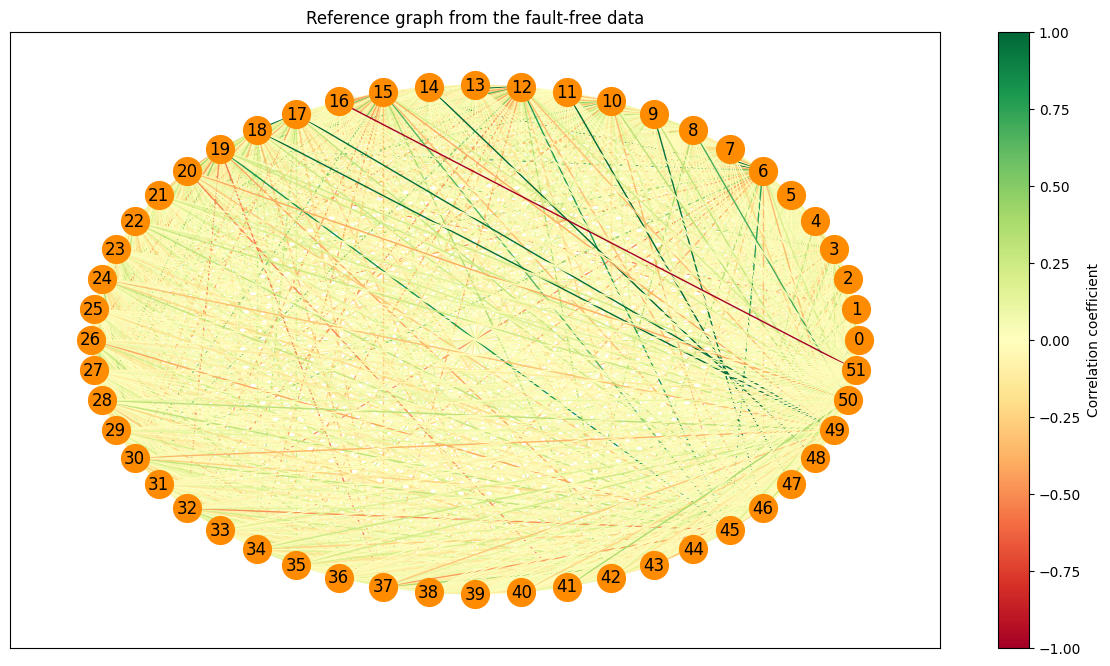

In [35]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
# nodecolor = plt.cm.BuPu
edgecolor = plt.cm.RdYlGn
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G, pos=nx.circular_layout(G), ax=axs, edgelist=edges, edge_color=weights, edge_cmap=edgecolor, width=1, 
                  node_size=400, node_color='darkorange') #pos=nx.circular_layout(G), node_size=(int1_nodesize-ref_nodesize)*200,cmap=nodecolor node_color=ref_nodesize,
norm1 = mpl.colors.Normalize(vmin=0, vmax=4500)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm1, cmap=nodecolor),
#              ax=axs, orientation='vertical', label='Average signal intensity', fraction=0.07, pad=0.05, location='left')
norm2 = mpl.colors.Normalize(vmin=-1, vmax=1)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=edgecolor),
             ax=axs, orientation='vertical', label='Correlation coefficient')
plt.title('Reference graph from the fault-free data')
plt.show()

In [36]:
fig.savefig('figure/sample_network.png', bbox_inches='tight')

In [ ]:
df_fualt_ints = []
for i in range(0, 500, 5):
    df_fualt_ints.append(df_fualt_run1.loc[5*i:5*(i+1)])
len(df_fualt_ints)    